## Example of the Dynamic Mode Decomposition (DMD) of a 1D single wave 
Test Function : 
$$
f(x,t)=A_{1}\exp[-\frac{(x-x_{1})^{2}}{2\sigma_{1}^{2}}]\cos(2\pi f_{1}t)+A_{2}\exp[-\frac{(x-x_{2})^{2}}{2\sigma_{2}^{2}}]\cos(2\pi f_{2}t)
$$

In [1]:
using LinearAlgebra, Plots;gr();default(size=(300,200))

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [2]:
# Define the dataset Y
Nx = 401
x = range(-2,2,length=Nx) #  spatial coordinate (dx = 0.01)

Nt = 201
t = range(0,2,length=Nt) # time coordinate (dt = 0.01)
dt = t[2]-t[1]
A1 = 1.
x1 = 0.5
σ1 = 0.2
f1 = 1.

A2 = 2.
x2 = -1.
σ2 = 0.2
f2 = 4.

#gaussian processes
y1(x) = A1*exp(-((x-x1)^2)/(2*σ1^2))
y2(x) = A2*exp(-((x-x2)^2)/(2*σ2^2));

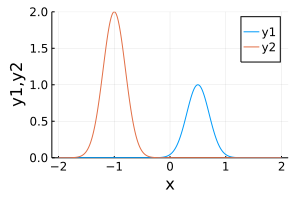

In [3]:
# plot of the two spatial bumps
plot(x,y1)
plot!(x,y2,xlabel="x",ylabel="y1,y2",ylim=(-0.001,2.))

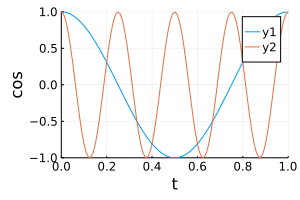

In [4]:
# plot of the two temporal dynamics
plot(t,cos.(2*π*f1*t))
plot!(t,cos.(2*π*f2*t),xlabel="t",ylabel="cos",xlim=(0,1),ylim=(-1,1))

In [5]:
#  Building the two dimensional continous function f(x,t)
f_1(x,t)=A1*exp(-((x-x1)^2)/(2*σ1^2))*cos(2*π*f1*t)
f_2(x,t)=A2*exp(-((x-x2)^2)/(2*σ2^2))*cos(2*π*f2*t)
f(x,t)=f_1(x,t)+f_2(x,t)

f (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD_f_1_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD_f_1_fps15.gif")
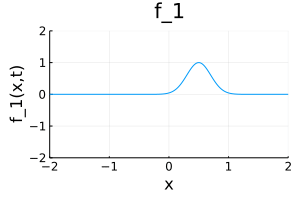

In [6]:
anim = @animate for tt in t
    plot( x, f_1.(x,tt),xlim=(-2,2),title="f_1",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_1(x,t)")
end
gif(anim, "img/DMD_f_1_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD_f_2_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD_f_2_fps15.gif")
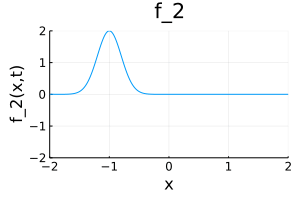

In [7]:
anim = @animate for tt in t
    plot( x, f_2.(x,tt),xlim=(-2,2),title="f_2",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_2(x,t)")
end
gif(anim, "img/DMD_f_2_fps15.gif", fps = 15)

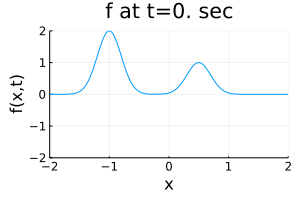

In [8]:
    plot( x, f.(x,0),xlim=(-2,2),title="f at t=0. sec",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f(x,t)")


┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD_f_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD_f_fps15.gif")
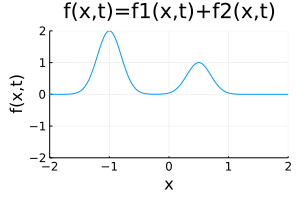

In [9]:
anim = @animate for tt in t
    plot( x, f.(x,tt),xlim=(-2,2),title="f(x,t)=f1(x,t)+f2(x,t)",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f(x,t)")
end
gif(anim, "img/DMD_f_fps15.gif", fps = 15)

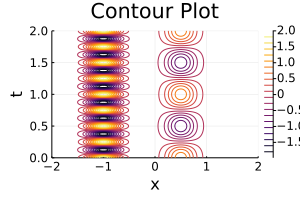

In [10]:
# 2D Contour Plot of the data matrix Y
contour(x,t,f,levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

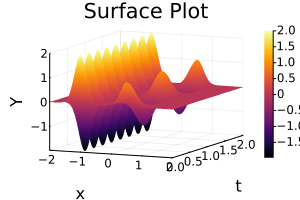

In [11]:
# 3D Surface Plot of the dataset
#my_cg = cgrad([:blue, :yellow])
surface(x,t,f, xaxis="x", yaxis="t",zaxis="Y", title="Surface Plot")

In [12]:
#  Building the discrete spatio-temporal series Y 
#Build of the spatio-temporal x vs t data matrix Y
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1.(x)*cos(2*π*f1*tt) + y2.(x)*cos(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end
println("\rThe Data Matrix Y = \r")
Y

The Data Matrix Y = 


401×201 Matrix{Float64}:
 7.45331e-6   7.21915e-6   6.53138e-6   …  7.21915e-6   7.45331e-6
 9.55828e-6   9.25799e-6   8.37598e-6      9.25799e-6   9.55828e-6
 1.22271e-5   1.1843e-5    1.07147e-5      1.1843e-5    1.22271e-5
 1.56021e-5   1.5112e-5    1.36723e-5      1.5112e-5    1.56021e-5
 1.9859e-5    1.92351e-5   1.74026e-5      1.92351e-5   1.9859e-5
 2.52142e-5   2.44221e-5   2.20954e-5   …  2.44221e-5   2.52142e-5
 3.19336e-5   3.09303e-5   2.79836e-5      3.09303e-5   3.19336e-5
 4.03426e-5   3.90752e-5   3.53525e-5      3.90752e-5   4.03426e-5
 5.08387e-5   4.92415e-5   4.45503e-5      4.92415e-5   5.08387e-5
 6.39056e-5   6.18979e-5   5.60009e-5      6.18979e-5   6.39056e-5
 8.01306e-5   7.76131e-5   7.0219e-5    …  7.76131e-5   8.01306e-5
 0.000100224  9.70753e-5   8.7827e-5       9.70753e-5   0.000100224
 0.000125043  0.000121115  0.000109576     0.000121115  0.000125043
 ⋮                                      ⋱               ⋮
 3.24523e-11  3.23883e-11  3.21964e-11     3.

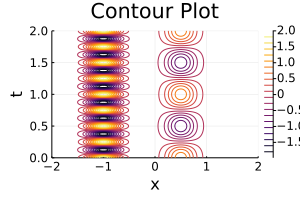

In [13]:
# another way to create the data matrix Y (like the matlab meshgrid function )
X = repeat(reshape(x, :, 1), 1,length(t))
T = repeat(reshape(t,1,:),  length(x),1)
YY = map(f, X, T)

# 2D Contour Plot of the data matrix Y
contour(X[:,1],T[1,:],YY',levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

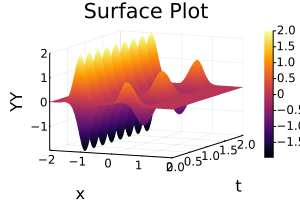

In [14]:
surface(X[:,1],T[1,:],YY', xaxis="x", yaxis="t",zaxis="YY", title="Surface Plot")

In [15]:
# Data decomposition with the singular value decomposition 
# U matrix (spatial Correlations); Σ matrix (weighting of projections), Vt (time dynamics)
Y1 = Y[:,1:end - 1]
Y2 = Y[:,2:end]
U, Σ, V=svd(Y1);

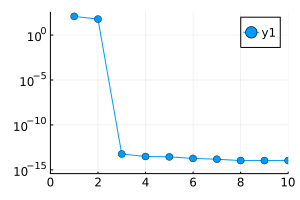

In [16]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) The very good decay shows the existence of a low rank subspace =#
plot(Σ, yaxis=:log, xlim=(0,10),shape =:circle)

In [17]:
# SVD and rank-2 truncation
r = 2
Uᵣ = U[:,1:r]
Σᵣ = diagm(Σ[1:r])
Vᵣ = V[:,1:r];

# Build Ã and DMD Modes
Ã = Uᵣ' * Y2 * Vᵣ / Σᵣ
Λ, W = eigen(Ã, sortby=nothing)
Φ = Y2 * Vᵣ / Σᵣ * W

# DMD Spectra
Ω = log.(Λ)/dt

# DMD mode amplitude
y₁=Y1[:,1]
b=Φ\y₁

2-element Vector{Float64}:
 12.294066193912963
  5.965684664568548

In [18]:
Φ

401×2 Matrix{Float64}:
 6.06252e-7   -2.10451e-21
 7.77471e-7   -2.68041e-21
 9.94556e-7   -3.44353e-21
 1.26908e-6   -4.41558e-21
 1.61533e-6   -5.59255e-21
 2.05093e-6   -7.1157e-21
 2.59748e-6   -8.98248e-21
 3.28147e-6   -1.14325e-20
 4.13522e-6   -1.419e-20
 5.19809e-6   -1.79451e-20
 6.51783e-6   -2.27022e-20
 8.15223e-6   -2.76887e-20
 1.0171e-5    -3.5328e-20
 ⋮            
 5.02434e-26   5.43983e-12
 3.54745e-26   3.83818e-12
 2.49446e-26   2.70134e-12
 1.75229e-26   1.89648e-12
 1.22589e-26   1.3281e-12
 8.5674e-27    9.27741e-13
 5.97131e-27   6.46454e-13
 4.15337e-27   4.49328e-13
 2.87771e-27   3.11532e-13
 1.99321e-27   2.15455e-13
 1.37485e-27   1.48636e-13
 9.44436e-28   1.02284e-13

In [19]:
ỹ₁=Σᵣ*Vᵣ[1,:]
b=W*diagm(Λ)\ỹ₁

2-element Vector{Float64}:
 12.294066193912958
  5.9656846645685455

In [20]:
time_dynamics=zeros(r,length(t))

for i in 1:length(t)
    time_dynamics[:,i] =b.*exp.(Ω* t[i])
end  

## Reduction and Reconstruction with feature extraction (two building blocks with their own dynamics are shown to exist)

In [21]:
YDMD=Φ*time_dynamics

401×201 Matrix{Float64}:
 7.45331e-6   7.21915e-6   6.99234e-6   …  1.29896e-8   1.25815e-8
 9.55828e-6   9.25799e-6   8.96713e-6      1.66581e-8   1.61348e-8
 1.22271e-5   1.1843e-5    1.14709e-5      2.13094e-8   2.06399e-8
 1.56021e-5   1.5112e-5    1.46372e-5      2.71913e-8   2.6337e-8
 1.9859e-5    1.92351e-5   1.86308e-5      3.46102e-8   3.35228e-8
 2.52142e-5   2.44221e-5   2.36548e-5   …  4.39432e-8   4.25626e-8
 3.19336e-5   3.09303e-5   2.99586e-5      5.56536e-8   5.39052e-8
 4.03426e-5   3.90752e-5   3.78475e-5      7.03088e-8   6.80999e-8
 5.08387e-5   4.92415e-5   4.76945e-5      8.86014e-8   8.58178e-8
 6.39056e-5   6.18979e-5   5.99533e-5      1.11374e-7   1.07875e-7
 8.01306e-5   7.76131e-5   7.51748e-5   …  1.39651e-7   1.35264e-7
 0.000100224  9.70753e-5   9.40255e-5      1.7467e-7    1.69182e-7
 0.000125043  0.000121115  0.00011731      2.17924e-7   2.11078e-7
 ⋮                                      ⋱               ⋮
 3.24523e-11  3.23883e-11  3.23243e-11     2.19

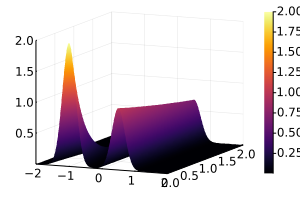

In [22]:
surface(x,t,YDMD')

┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD_Y_DMD1_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD_Y_DMD1_fps15.gif")
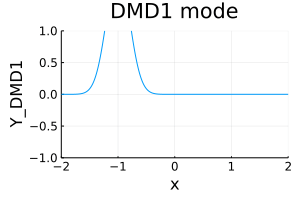

In [23]:
#Animation of the first DMD mode
Y_DMD1=Φ[:,1]*time_dynamics[1,:]'
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Y_DMD1[:,j],xlim=(-2,2),ylim=(-1.,1.),leg=false,title="DMD1 mode",xlabel="x",ylabel="Y_DMD1")
    j+=1
end
gif(anim, "img/DMD_Y_DMD1_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD_Y_DMD2_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD_Y_DMD2_fps15.gif")
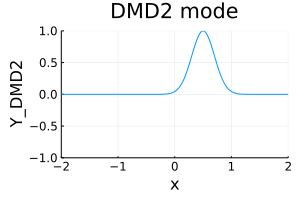

In [24]:
#Animation of the 2nd DMD mode 
Y_DMD2=real(Φ[:,2]*time_dynamics[2,:]')
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Y_DMD2[:,j],xlim=(-2.,2.),ylim=(-1.,1.),leg=false,title="DMD2 mode",xlabel="x",ylabel="Y_DMD2")
    j+=1
end
gif(anim, "img/DMD_Y_DMD2_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = d:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\DMD2_Yrecons_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\SVksJ\src\animation.jl:104


Plots.AnimatedGif("d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\DMD2_Yrecons_fps15.gif")
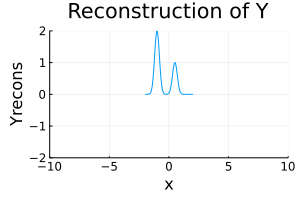

In [25]:
#Animation of Yrecons = Y_DMD1+Y_DMD2
Yrecons=Y_DMD1+Y_DMD2
anim=Animation()
j=1
anim = @animate for tt in t
    plot( x, Yrecons[:,j],xlim=(-10,10),ylim=(-2.,2.),leg=false,title="Reconstruction of Y",xlabel="x",ylabel="Yrecons")
    j+=1
end
gif(anim, "img/DMD2_Yrecons_fps15.gif", fps = 15)

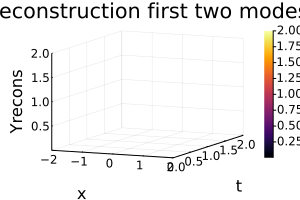

Arrays have incorrect length or dimension.


In [26]:
plot(x,t,Yrecons,st=:surface,xaxis="x", yaxis="t",zaxis="Yrecons")
title!("Reconstruction first two modes")